
# Predictive Femicide Risk Detection in Kenya

## Problem Statement
Femicideâ€”the gender-based killing of womenâ€”is a growing concern in Kenya, with over 150 cases reported in 2023 alone. These deaths are often the culmination of repeated gender-based violence (GBV), emotional abuse, and systemic failures to intervene. Traditional response mechanisms are reactive, often triggered too late.

There is an urgent need for a data-driven, preventative approach that can flag high-risk cases early and guide timely interventions from law enforcement, social workers, or NGOs.


## Stakeholders
The success of a preventative femicide project relies on collaboration across sectors. Below are the key stakeholders and their roles:

- NGOs and Civil Society Organizations
e.g., FIDA Kenya, Wangu Kanja Foundation
Support survivors, use risk assessment tools for early interventions, provide shelters, and report case data.

- Law Enforcement Agencies
Use predictive tools to identify high-risk individuals or regions and prioritize protective action.

- Healthcare Providers
Flag victims with recurring injuries, mental health issues, or delayed reporting patterns.

- Judiciary and Legal Practitioners
Incorporate risk indicators into protection orders, court rulings, or bail/parole decisions.

- Government and Policy Makers
Allocate resources more effectively, design GBV prevention policies based on insights.

- Survivors and Local Communities
Receive better protection and support through proactive systems designed to detect risk.

- Data Scientists and Researchers
Develop, test, and maintain ethical machine learning models for prevention and triage.

## Objectives
1. To develop an AI-powered system that analyzes user-reported messages and behavior patterns to detect early signs of gender-based violence and potential femicide risk.
2. To provide real-time safety features such as a panic button, emergency contact alerts, and access to support services including counseling, shelters, and legal aid
3. To raise awareness and educate users on recognizing abuse, understanding their rights, and building safety plans through localized, culturally relevant content

In [1]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as snS
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### FIRST DATASET

In [2]:
# Load the dataset
df_1 = pd.read_excel("kenya-femicide-data_2016_dec2023 (3).xlsx")

# Show the first few rows
df_1.head()


url  \
0  http://www.standardmedia.co.ke/article/2000218...   
1  http://www.standardmedia.co.ke/article/2001300...   
2  http://www.standardmedia.co.ke/article/2001241...   
3  http://www.nation.co.ke/news/Kabogo-cleared-Me...   
4  http://www.mediamaxnetwork.co.ke/news/pastor-t...   

                                               title     author_name  \
0   Meru man who killed drunk wife sentenced to hang  Lydiah Nyawira   
1  Court: Kakamega man guilty of raping, killing ...     Jack Murima   
2  My wife 'died from fall in fight over volume o...   Kamau Muthoni   
3    Kabogo cleared in varsity student's murder case   ELISHA OTIENO   
4  Pastor to serve 25 years in jail for defiling,...    People Daily   

                     medium country_name  \
0  Standard Digital (Kenya)        Kenya   
1  Standard Digital (Kenya)        Kenya   
2  Standard Digital (Kenya)        Kenya   
3      Daily Nation (Kenya)        Kenya   
4          MediaMax Network        Kenya   

                                                text published_date  \
0  On August 12, 2005 at around 7pm, Joyce Gacher...     2016-10-05   
1  Jack Murima - Sun, 28. October 2018 12:54 PM -...     2018-10-29   
2  Former journalist Moses Dola Otieno yesterday ...     2017-05-25   
3  Kiambu Governor Kabogo and five others adverse...     2016-10-07   
4  Musa Wekesa A pastor from Kitale has been sent...     2019-05-25   

  type of murder       name of victim      Age  ... Type of femicide  \
0       Femicide        Dorcas Kaguri  Unknown  ...         Intimate   
1       Femicide  Selina Ikambi Anasi       79  ...     Non-intimate   
2       Femicide        Wambui Kabiru  Unknown  ...         Intimate   
3       Femicide          Mercy Keino  Unknown  ...          Unknown   
4       Femicide   Scholastica Mmbihi  Unknown  ...          Unknown   

   Murder Scene Mode of killing Circumstance Status on article date  \
0          home     blunt force     Argument                Unknown   
1  Public Space          hacked      Unknown                Unknown   
2          home     blunt force     Argument                Unknown   
3  Public Space         Unknown      Unknown                Unknown   
4          home         stabbed     Argument                Unknown   

  Court date (first appearance)         verdict date     Verdict  \
0           2005-08-13 00:00:00  2016-06-24 00:00:00      Guilty   
1                       Unknown  2018-10-28 00:00:00      guilty   
2                       Unknown  2018-10-05 00:00:00      guilty   
3                       Unknown  2016-10-07 00:00:00  Not Guilty   
4                       Unknown  2019-05-25 00:00:00      guilty   

  Years of sentence Days to verdict  
0             Death          4061.0  
1   awaiting ruling          2817.0  
2                10          2714.0  
3             Freed          1939.0  
4                25          2879.0  

[5 rows x 24 columns]

In [3]:
df_1.columns

Index(['url', 'title', 'author_name', 'medium', 'country_name', 'text',
       'published_date', 'type of murder', 'name of victim', 'Age',
       'date of murder', 'Location', 'name of suspect', 'suspect relationship',
       'Type of femicide', 'Murder Scene', 'Mode of killing', 'Circumstance',
       'Status on article date', 'Court date (first appearance)',
       'verdict date', 'Verdict', 'Years of sentence', 'Days to verdict'],
      dtype='object')

In [4]:
# Basic info: columns, non-null counts, data types
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   url                            507 non-null    object        
 1   title                          479 non-null    object        
 2   author_name                    473 non-null    object        
 3   medium                         495 non-null    object        
 4   country_name                   492 non-null    object        
 5   text                           468 non-null    object        
 6   published_date                 479 non-null    datetime64[ns]
 7   type of murder                 507 non-null    object        
 8   name of victim                 507 non-null    object        
 9   Age                            507 non-null    object        
 10  date of murder                 507 non-null    object        
 11  Location           

In [5]:
df_1.describe(include='all')

url  \
count                                                 507   
unique                                                507   
top     http://www.standardmedia.co.ke/article/2000218...   
freq                                                    1   
mean                                                  NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   
std                                                   NaN   

                                                    title   author_name  \
count                                                 479           473   
unique                                                476           285   
top     Kisumu man arrested for killing wife after dom...  Cyrus Ombati   
freq                                                    2            14   
mean                                                  NaN           NaN   
min                                                   NaN           NaN   
25%                                                   NaN           NaN   
50%                                                   NaN           NaN   
75%                                                   NaN           NaN   
max                                                   NaN           NaN   
std                                                   NaN           NaN   

                  medium country_name  \
count                495          492   
unique                26            1   
top     The Star (Kenya)        Kenya   
freq                 176          492   
mean                 NaN          NaN   
min                  NaN          NaN   
25%                  NaN          NaN   
50%                  NaN          NaN   
75%                  NaN          NaN   
max                  NaN          NaN   
std                  NaN          NaN   

                                                     text  \
count                                                 468   
unique                                                468   
top     On August 12, 2005 at around 7pm, Joyce Gacher...   
freq                                                    1   
mean                                                  NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   
std                                                   NaN   

                       published_date type of murder name of victim      Age  \
count                             479            507            507      507   
unique                            NaN              2            399       65   
top                               NaN       Femicide        Unnamed  Unknown   
freq                              NaN            493            103      195   
mean    2020-04-23 07:24:55.615866624            NaN            NaN      NaN   
min               2016-01-01 00:00:00            NaN            NaN      NaN   
25%               2018-07-02 12:00:00            NaN            NaN      NaN   
50%               2020-04-27 00:00:00            NaN            NaN      NaN   
75%               2022-01-09 00:00:00            NaN            NaN      NaN   
max               2023-12-06 00:00:00            NaN            NaN      NaN   
std                               NaN            NaN            NaN      NaN   

        ... Type of femicide Murder Scene Mode of killing Circumstance  \
count   ...              448          507             507          438   
unique  ...                7           10              13           48   
top     ...

In [6]:
# Check for missing values
df_1.isnull().sum()

url                                0
title                             28
author_name                       34
medium                            12
country_name                      15
text                              39
published_date                    28
type of murder                     0
name of victim                     0
Age                                0
date of murder                     0
Location                           2
name of suspect                   39
suspect relationship               2
Type of femicide                  59
Murder Scene                       0
Mode of killing                    0
Circumstance                      69
Status on article date            71
Court date (first appearance)     99
verdict date                       0
Verdict                          101
Years of sentence                102
Days to verdict                  471
dtype: int64

In [7]:
# Check all columns for literal string "Unknown"
unknown_all = df_1.apply(lambda col: col.astype(str).str.lower().eq('unknown').sum())
unknown_all = unknown_all[unknown_all > 0].sort_values(ascending=False)
print(unknown_all)

verdict date                     471
Years of sentence                369
Verdict                          368
Court date (first appearance)    341
Age                              195
name of suspect                  154
Circumstance                     149
Mode of killing                   66
Status on article date            59
Type of femicide                  50
Murder Scene                      38
date of murder                    14
author_name                        9
name of victim                     3
Location                           2
dtype: int64


In [8]:
# Copy the original DataFrame
df_1_cleaned = df_1.copy()

# Replace 'unknown' or '#VALUE!' with NaN
df_1_cleaned.replace(
    r'(?i)^\s*(unknown|#VALUE!)\s*$',
    np.nan,
    regex=True,
    inplace=True)

# Let pandas infer nullable dtypes
df_1_cleaned = df_1_cleaned.convert_dtypes()

# Revert StringDtype to object (so later fillna('Unknown') works)
str_ext = df_1_cleaned.select_dtypes(include='string').columns
df_1_cleaned[str_ext] = df_1_cleaned[str_ext].astype('object')

# Revert numeric extension types to numpy built-ins

int_cols = df_1_cleaned.select_dtypes(include='int').columns
float_cols = df_1_cleaned.select_dtypes(include='float').columns
bool_cols = df_1_cleaned.select_dtypes(include='bool').columns



for col in int_cols:
    s = df_1_cleaned[col]
    df_1_cleaned[col] = s.astype('int64') if not s.isna().any() else s.astype('float64')

df_1_cleaned[float_cols] = df_1_cleaned[float_cols].astype('float64')
df_1_cleaned[bool_cols]  = df_1_cleaned[bool_cols].astype('bool')

# Convert verdict date to datetime
df_1_cleaned['verdict date'] = pd.to_datetime(
    df_1_cleaned['verdict date'],
    dayfirst=True,
    errors='coerce'
)


# check if NaNs still present
print("Remaining missing values:", df_1_cleaned.isna().sum())
print("Current dtypes:", df_1_cleaned.dtypes)

Remaining missing values: url                                0
title                             28
author_name                       43
medium                            12
country_name                      15
text                              39
published_date                    28
type of murder                     0
name of victim                     3
Age                              195
date of murder                    14
Location                           4
name of suspect                  193
suspect relationship               2
Type of femicide                 109
Murder Scene                      38
Mode of killing                   66
Circumstance                     218
Status on article date           130
Court date (first appearance)    440
verdict date                     471
Verdict                          469
Years of sentence                471
Days to verdict                  471
dtype: int64
Current dtypes: url                                      object
title    

In [9]:
# Identify categorical and numeric columns
categorical_cols = df_1_cleaned.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df_1_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print()
print("nNumeric columns:", numeric_cols)


Categorical columns: ['url', 'title', 'author_name', 'medium', 'country_name', 'text', 'type of murder', 'name of victim', 'Location', 'name of suspect', 'suspect relationship', 'Type of femicide', 'Murder Scene', 'Mode of killing', 'Circumstance', 'Status on article date', 'Court date (first appearance)', 'Verdict', 'Years of sentence']

nNumeric columns: ['Age', 'Days to verdict']


In [10]:
df_1_cleaned['Age'] = df_1_cleaned['Age'].fillna(df_1_cleaned['Age'].median())


In [11]:
df_1_cleaned['date of murder'] = pd.to_datetime(df_1_cleaned['date of murder'], errors='coerce')
df_1_cleaned['published_date'] = pd.to_datetime(df_1_cleaned['published_date'], errors='coerce')


In [12]:
df_1_cleaned['published_date'] = df_1_cleaned['published_date'].fillna(pd.Timestamp('1900-01-01'))
df_1_cleaned['date of murder'] = df_1_cleaned['date of murder'].fillna(pd.Timestamp('1900-01-01'))


In [13]:
df_1_cleaned['name of victim'].duplicated().sum()

108

In [14]:
#  Start from a clean copy
df__1_cleaned = df_1.copy()

# Regex to catch all placeholder strings
placeholder_pattern = r'(?i)^\s*(?:nan|none|null|unknown|#value!)\s*$'

# Identify all text-like columns
cat_cols = df_1_cleaned.select_dtypes(include=['object','string','category']).columns

# Force them to object dtype
df_1_cleaned[cat_cols] = df_1_cleaned[cat_cols].astype('object')

# Replace placeholders with real NaN
df_1_cleaned[cat_cols] = (
    df_1_cleaned[cat_cols]
    .replace(placeholder_pattern, np.nan, regex=True)
)

# Fill NaNs in categorical columns with "Unknown"
df_1_cleaned[cat_cols] = df_1_cleaned[cat_cols].fillna('Unknown')

# Convert Age to numeric & median-impute
df_1_cleaned['Age'] = pd.to_numeric(df_1_cleaned['Age'], errors='coerce')
df_1_cleaned['Age'] = df_1_cleaned['Age'].fillna(df_1_cleaned['Age'].median())

# Identify any other numeric columns
other_num_cols = [
    c for c in df_1_cleaned.select_dtypes(include=[np.number]).columns
    if c != 'Age'
]

# Coerce and median-impute the rest
df_1_cleaned[other_num_cols] = (
    df_1_cleaned[other_num_cols]
    .apply(lambda s: pd.to_numeric(s, errors='coerce'))
    .fillna(df_1_cleaned[other_num_cols].median())
)

# missing-value check
print("Categorical missing:", df_1_cleaned[cat_cols].isna().sum().sum())
print("Numeric missing:", df_1_cleaned[['Age'] + other_num_cols].isna().sum().sum())


Categorical missing: 0
Numeric missing: 0


In [15]:
# Exclude these columns
exclude_cols = ["url", "text", "name of victim"]

#Object columns
cols = [
    c for c in df_1_cleaned.select_dtypes(include=["object"]).columns
    if c not in exclude_cols
]

# Normalize, strip, lower, then Title-case
for col in cols:
    df_1_cleaned[col] = (
        df_1_cleaned[col]
        .astype(str)
        .str.strip()
        .str.lower()
        .str.title())


print(df_1_cleaned[cols].head())
print(df_1_cleaned[exclude_cols].head())

                                               title     author_name  \
0   Meru Man Who Killed Drunk Wife Sentenced To Hang  Lydiah Nyawira   
1  Court: Kakamega Man Guilty Of Raping, Killing ...     Jack Murima   
2  My Wife 'Died From Fall In Fight Over Volume O...   Kamau Muthoni   
3    Kabogo Cleared In Varsity Student'S Murder Case   Elisha Otieno   
4  Pastor To Serve 25 Years In Jail For Defiling,...    People Daily   

                     medium country_name type of murder  \
0  Standard Digital (Kenya)        Kenya       Femicide   
1  Standard Digital (Kenya)        Kenya       Femicide   
2  Standard Digital (Kenya)        Kenya       Femicide   
3      Daily Nation (Kenya)        Kenya       Femicide   
4          Mediamax Network        Kenya       Femicide   

                          Location         name of suspect  \
0    Gaintume Village, Meru County            Julius Koome   
1  Mituri Village, Kakamega County  Wilson Masiko Mungasia   
2     Umoja Estate, Nairob

In [16]:
import unicodedata
from rapidfuzz import process, fuzz

# Normalize valid counties
valid_counties = [
    'Baringo', 'Bomet', 'Bungoma', 'Busia', 'Elgeyo Marakwet', 'Embu', 'Garissa',
    'Homa Bay', 'Isiolo', 'Kajiado', 'Kakamega', 'Kericho', 'Kiambu', 'Kilifi',
    'Kirinyaga', 'Kisii', 'Kisumu', 'Kitui', 'Kwale', 'Laikipia', 'Lamu',
    'Machakos', 'Makueni', 'Mandera', 'Marsabit', 'Meru', 'Migori', 'Mombasa',
    'Murangâ€™a', 'Nairobi', 'Nakuru', 'Nandi', 'Narok', 'Nyamira', 'Nyandarua',
    'Nyeri', 'Samburu', 'Siaya', 'Taita Taveta', 'Tana River', 'Tharaka Nithi',
    'Trans Nzoia', 'Turkana', 'Uasin Gishu', 'Vihiga', 'Wajir', 'West Pokot'
]
normalized_counties = [unicodedata.normalize('NFKD', c).encode('ascii', 'ignore').decode().lower() for c in valid_counties]

# Helpers
def normalize_text(text):
    if pd.isnull(text): return ""
    text = unicodedata.normalize('NFKD', str(text)).encode('ascii', 'ignore').decode()
    return re.sub(r"[â€™'`]", "", text).lower().strip()

def extract_county_from_text(text):
    match = re.search(r'([A-Za-zâ€™\'\-\s]+?)\s+County', str(text), re.IGNORECASE)
    if match:
        return normalize_text(match.group(1))
    return None

In [17]:
# Strip, Title case, and try to resolve county
df_1_cleaned['Location'] = df_1_cleaned['Location'].astype(str).str.strip().str.title()

def resolve_county(row):
    location = row.get('Location', '')
    raw_county = row.get('County', '')

    # Direct clean match
    cleaned = normalize_text(raw_county)
    if cleaned in normalized_counties:
        return valid_counties[normalized_counties.index(cleaned)]

    # Pattern match like "X County"
    extracted = extract_county_from_text(location)
    if extracted:
        guess, score, _ = process.extractOne(extracted, normalized_counties, scorer=fuzz.ratio)
        if score > 85:
            return valid_counties[normalized_counties.index(guess)]

    # Fuzzy match full location text
    location_clean = normalize_text(location)
    guess, score, _ = process.extractOne(location_clean, normalized_counties, scorer=fuzz.ratio)
    if score > 85:
        return valid_counties[normalized_counties.index(guess)]

    return None

df_1_cleaned['County'] = df_1_cleaned.apply(resolve_county, axis=1)


In [18]:
unmatched_locations = df_1_cleaned[df_1_cleaned['County'].isna()]['Location'].dropna().unique().tolist()
print(unmatched_locations)


['Unknown', 'Kamiti Corner In Kasarani', 'Highway Complex Lodge, Migory County', 'Nyayo Estate, Embakasi, Nairobi', 'Umoja Iii Estate', 'Freehold Estate, Nakuru', 'Muthaiga Estate', 'Muthure, Kikuyu Constituency', 'Kahawa Wendani', 'Karuku, Kandara\nSubcounty, Muranga', 'Kiganjo Estate In Thika.', 'Kahawa Sukari', 'Tom Mboya Street, Nairobi', 'Egerton University, Njokerio Area, Njoro', "Maragua Ridge, Murang'A South", 'Eldoret Townuasin Gishu County', 'Biasumu Village, Migory County', 'Mbuyuni Village In Likoni, Mombasa', 'Bundo In Bogichora, Nyamira South', 'Sinderma Village', 'Lanet, Nakuru', 'Kitengela', 'Bendera Area, West Pokot', 'Lwala Sub Location, Gwassi East Location In Suba Sub-County', 'Naishi Village, Muthira Sub-Location, Njoro Constituency In Nakuru', 'Kasarani', 'Kangemi, Nairobi, County', 'Kosoywa Estate, Near Nandi Hills Town, Nnadi County', 'Kikumbo Village, Kalama Sub-County.', 'Lari, Limuru', 'Mtongwe, Mombasa', 'Tembwo Trading Centre,Sotik Sub County, Bomet', 'Tush

In [19]:
# If still missing, try extracting from comma-separated part
df_1_cleaned['County'] = df_1_cleaned['County'].fillna(
    df_1_cleaned['Location'].str.split(',').str[-1].str.strip().str.title()
)

# Town-to-county mapping
town_to_county = {
    'Kitengela': 'Kajiado', 'Kasarani': 'Nairobi', 'Muchatha': 'Kiambu',
    'Santonia Court': 'Nairobi', 'Rukanga Village': 'Kirinyaga', 'Iten Town': 'Elgeyo Marakwet',
    'Eldoret Town': 'Uasin Gishu', 'Naivasha': 'Nakuru', 'Gilgil': 'Nakuru',
    'Buruburu Phase 5': 'Nairobi', 'Umoja Estate': 'Nairobi', 'Kibera Slums': 'Nairobi',
    'Ongata Rongai': 'Kajiado', 'Navakholo': 'Kakamega', 'Kitale': 'Trans Nzoia',
    'Kisii': 'Kisii'
}

#  for unmatched  cases
manual_fixes = {
    'Tembwo Trading Centre,Sotik Sub County, Bomet': 'Bomet',
    'Biasumu Village, Migory County': 'Migori',
    'Kosoywa Estate, Near Nandi Hills Town, Nnadi County': 'Nandi',
    'Sinderma Village': 'West Pokot',
    'Kamulu': 'Nairobi',
    'Karagita Area, Naivasha': 'Nakuru',
    'Railways Police Lines In Eldoret': 'Uasin Gishu',
    'Bandani Village In Kisumu.': 'Kisumu'}
 

# Apply town & manual mapping
def final_fix(row):
    loc = row['Location'].split(',')[0].strip().title()
    return manual_fixes.get(row['Location'], town_to_county.get(loc, row['County']))

df_1_cleaned['County'] = df_1_cleaned.apply(final_fix, axis=1)

# Normalize minor spelling inconsistencies
county_fix_map = {
    'Muranga': 'Murangâ€™a', 'Muranga County': 'Murangâ€™a', 'Murang\'A': 'Murangâ€™a',
    'Unknown': None, 'Nan': None, 'X': None
}
df_1_cleaned['County'] = df_1_cleaned['County'].replace(county_fix_map).str.strip().str.title()


In [20]:
#  Fill NaN County using last part of Location
df_1_cleaned['County'] = df_1_cleaned['County'].fillna(
    df_1_cleaned['Location'].str.split(',').str[-1].str.strip().str.title()
)

# Town to County mapping
town_to_county = {
    'Kitengela': 'Kajiado', 'Kasarani': 'Nairobi', 'Muchatha': 'Kiambu',
    'Santonia Court': 'Nairobi', 'Rukanga Village': 'Kirinyaga', 'Iten Town': 'Elgeyo Marakwet',
    'Eldoret Town': 'Uasin Gishu', 'Naivasha': 'Nakuru', 'Gilgil': 'Nakuru',
    'Buruburu Phase 5': 'Nairobi', 'Umoja Estate': 'Nairobi', 'Kibera Slums': 'Nairobi',
    'Ongata Rongai': 'Kajiado', 'Navakholo': 'Kakamega', 'Kitale': 'Trans Nzoia',
    'Kisii': 'Kisii'}

# Manual override mapping for edge cases
manual_fixes = {
    'Tembwo Trading Centre,Sotik Sub County, Bomet': 'Bomet',
    'Biasumu Village, Migory County': 'Migori',
    'Kosoywa Estate, Near Nandi Hills Town, Nnadi County': 'Nandi',
    'Sinderma Village': 'West Pokot',
    'Kamulu': 'Machakos',
    'Karagita Area, Naivasha': 'Nakuru',
    'Railways Police Lines In Eldoret': 'Uasin Gishu',
    'Bandani Village In Kisumu.': 'Kisumu',
    'Kalama Sub-County.': 'Machakos',
    'Limuru': 'Kiambu',
    'Sotik Sub': 'Bomet',
    'Nanyuki': 'Laikipia',
    'Maili Tisa Village In Loitokitok': 'Kajiado',
    'Kaloleni In Kilifi': 'Kilifi',
    'Ugenya Sub-County': 'Siaya',
    'Kapsabet': 'Nandi',
    'Endebess Sub': 'Trans Nzoia',
    'Kitui Town': 'Kitui',
    'Imenti South': 'Meru',
    'Mitikenda Estate On The Outskirts Of Ruiru': 'Kiambu',
    'Burgei Village In Kipkelion East Constituency': 'Kericho',
    'Rwamuthambi River In Kagio Town': 'Nyeri',
    'Gathugu Village In Mathira.': 'Nyeri',
    'Awendo Town-Siruti Road': 'Migori',
    'Embu.': 'Embu',
    'Naivasha': 'Nakuru',
    'Serem Area Of Vihiga': 'Vihiga',
    'Kanduyi Constituency': 'Bungoma',
    'Location In Vihiga': 'Vihiga',
    'Kiima Village In Kamuwongo Division Of Kyuso Sub': 'Kitui',
    'Maragua Town': 'Murangâ€™a',
    'Kamahohu In Tetu': 'Nyeri',
    'Kasambara Village, Gilgil Sub': 'Nakuru',
    'Imenti North': 'Meru',
    'Kodumo East Sub-Location In Rachuonyo East Sub-County': 'Homa Bay',
    'Baba Ndogo Nairobi': 'Nairobi',
    'Plainsview In South B': 'Nairobi',
    'Nairovi': 'Nairobi',
    'Taveta': 'Taita Taveta',
    'Taita Tavet': 'Taita Taveta',
    'Njoro': 'Nakuru',
    "Murang'A South": 'Murangâ€™a',
    'Marakwet': 'Elgeyo Marakwet',
    'Eldoret Townuasin Gishu': 'Uasin Gishu',
    'Uasin Gichu': 'Uasin Gishu',
    'N Airobi': 'Nairobi',
    'Nnadi': 'Nandi',
    'County': None,
    'Tran Nzoia': 'Trans Nzoia',
    'Nairobi.': 'Nairobi',
    'Nan': None}

# Final fix function
def final_fix(row):
    loc = row['Location'].split(',')[0].strip().title()
    return manual_fixes.get(row['Location'], town_to_county.get(loc, row['County']))

df_1_cleaned['County'] = df_1_cleaned.apply(final_fix, axis=1)

# Normalize known inconsistencies
county_fix_map = {
    'Muranga': 'Murangâ€™a', 'Muranga County': 'Murangâ€™a', "Murang'A": 'Murangâ€™a',
    'Homabay': 'Homa Bay', 'Migory': 'Migori', 'Unknown': None, 'Nan': None, 'X': None}

df_1_cleaned['County'] = (
    df_1_cleaned['County']
    .replace(county_fix_map)
    .str.strip()
    .str.title())

In [21]:
def final_county_cleanup(county_value):
    if pd.isna(county_value):
        return None
    cleaned = normalize_text(county_value)
    match, score, _ = process.extractOne(cleaned, normalized_counties, scorer=fuzz.ratio)
    if score > 85:
        return valid_counties[normalized_counties.index(match)]
    return None  
df_1_cleaned['County'] = df_1_cleaned['County'].apply(final_county_cleanup)


In [22]:
df_1_cleaned['County'].unique()

array(['Meru', 'Kakamega', 'Nairobi', 'Trans Nzoia', 'Kwale', 'Machakos',
       'Nakuru', None, 'Kitui', 'Kiambu', 'Kericho', 'Uasin Gishu',
       'Homa Bay', 'Murangâ€™a', 'Nyamira', 'Laikipia', 'Bomet', 'Nyeri',
       'Kisumu', 'Taita Taveta', 'Siaya', 'Kisii', 'Bungoma', 'Mombasa',
       'Embu', 'Makueni', 'Busia', 'Isiolo', 'Nyandarua', 'Kajiado',
       'Kirinyaga', 'Elgeyo Marakwet', 'Mandera', 'Nandi', 'West Pokot',
       'Migori', 'Lamu', 'Baringo', 'Vihiga', 'Kilifi', 'Tana River',
       'Turkana', 'Garissa', 'Narok', 'Tharaka Nithi', 'Marsabit'],
      dtype=object)

#### SECOND DATASET

In [23]:
import random
import pandas as pd
from faker import Faker

fake = Faker()
random.seed(42)

# Define risk levels
risk_levels = ['safe', 'at_risk', 'immediate_danger']

# Sentences for each risk level
def generate_sentence(label, fake_case=False):
    emojis = {
        'safe': ['ðŸ™‚', 'ðŸ’š', 'âœ¨', 'ðŸŒ»'],
        'at_risk': ['ðŸ˜Ÿ', 'ðŸ’”', 'ðŸ˜¥', 'ðŸ˜“'],
        'immediate_danger': ['ðŸ˜°', 'ðŸ’¢', 'ðŸ†˜', 'ðŸ’€']
    }
    children_mentions = [
        "my kids were home", "our daughter asked why we were yelling",
        "he never gets violent when the kids are around", "I told the children to stay in their room"
    ]
    calm_day = [
        "Today was peaceful", "We didn't argue at all today", "Everything felt calm for once", 
        "I even smiled today ðŸ™‚"
    ]
    at_risk_cases = [
        "He yelled at me again, but didnâ€™t hit me", 
        "He came home drunk and punched the wall", 
        "He threw my phone across the room ðŸ’”", 
        "I locked myself in the bathroom to avoid him"
    ]
    danger_cases = [
        "He strangled me while I was screaming ðŸ†˜", 
        "I ran out barefoot after he pulled a knife ðŸ’€", 
        "He threatened to kill me and the kids", 
        "I sent my sister a voice note before he smashed my phone"
    ]
    manipulative_safe = [
        "I said he hit me but I just wanted him out", 
        "I reported him because I wanted custody of our child", 
        "I told my mom I was scared even though we were okay"
    ]
    
    base = ""
    if fake_case:
        base = random.choice(manipulative_safe)
    elif label == 'safe':
        base = random.choice(calm_day)
    elif label == 'at_risk':
        base = random.choice(at_risk_cases)
    elif label == 'immediate_danger':
        base = random.choice(danger_cases)
        
    # Occasionally add children context
    if random.random() < 0.3:
        base += ". " + random.choice(children_mentions)
        
    # Occasionally add emojis
    if random.random() < 0.6:
        base += " " + random.choice(emojis[label])
    
    return base.strip()

# Generate dataset
data = []
for label in risk_levels:
    for _ in range(500):
        is_fake = False
        if label in ['at_risk', 'immediate_danger'] and random.random() < 0.1:
            is_fake = True
        entry = {
            'text': generate_sentence(label, fake_case=is_fake),
            'risk_level': label,
            'age': random.randint(18, 65),
            'is_fake_report': is_fake
        }
        data.append(entry)

# Create DataFrame
df = pd.DataFrame(data)

# Shuffle it
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Export to CSV
df.to_csv("femicide_simulated_dataset.csv", index=False)

print("Dataset generated and saved as 'femicide_simulated_dataset.csv'")


Dataset generated and saved as 'femicide_simulated_dataset.csv'


### DATA LOADING 

In [24]:
#loading datset
df = pd.read_csv('femicide_simulated_dataset.csv')
df.head()

text        risk_level  age  \
0  I reported him because I wanted custody of our...  immediate_danger   57   
1  He strangled me while I was screaming ðŸ†˜. our d...  immediate_danger   46   
2                            I even smiled today ðŸ™‚ ðŸ™‚              safe   20   
3  Today was peaceful. he never gets violent when...              safe   52   
4                               Today was peaceful ðŸ™‚              safe   18   

   is_fake_report  
0            True  
1           False  
2           False  
3           False  
4           False

In [25]:
df.shape

(1500, 4)

In [26]:
#checking for the class distribution
print(df['risk_level'].value_counts())
# Sample from each class
for label in df['risk_level'].unique():
    print(f"\n=== {label.upper()} ===")
    print(df[df['risk_level'] == label]['text'].sample(2).values)


risk_level
immediate_danger    500
safe                500
at_risk             500
Name: count, dtype: int64

=== IMMEDIATE_DANGER ===
['He strangled me while I was screaming ðŸ†˜ ðŸ†˜'
 'He threatened to kill me and the kids']

=== SAFE ===
['Everything felt calm for once' "We didn't argue at all today âœ¨"]

=== AT_RISK ===
['I locked myself in the bathroom to avoid him ðŸ˜“'
 'He yelled at me again, but didnâ€™t hit me']


### DATA CLEANING

In [27]:

print("Missing values per column", df.isnull().sum())

# View percentage of missing values
missing_percent = df.isnull().mean() * 100
print("Missing % per column:", missing_percent)

# Display sample rows with missing values 
if df.isnull().values.any():
    display(df[df.isnull().any(axis=1)].head())
else:
    print("\n No missing values found.")

Missing values per column text              0
risk_level        0
age               0
is_fake_report    0
dtype: int64
Missing % per column: text              0.0
risk_level        0.0
age               0.0
is_fake_report    0.0
dtype: float64

 No missing values found.


In [28]:
# delete the df_clean variable
if 'df_clean' in locals():
    del df_clean

# Reload the full original dataset 
df = pd.read_csv("femicide_simulated_dataset.csv")

# List the columns
print(df.columns)
df.head(10)


Index(['text', 'risk_level', 'age', 'is_fake_report'], dtype='object')


text        risk_level  age  \
0  I reported him because I wanted custody of our...  immediate_danger   57   
1  He strangled me while I was screaming ðŸ†˜. our d...  immediate_danger   46   
2                            I even smiled today ðŸ™‚ ðŸ™‚              safe   20   
3  Today was peaceful. he never gets violent when...              safe   52   
4                               Today was peaceful ðŸ™‚              safe   18   
5              He threw my phone across the room ðŸ’” ðŸ’”           at_risk   23   
6  I sent my sister a voice note before he smashe...  immediate_danger   63   
7  He threw my phone across the room ðŸ’”. he never ...           at_risk   63   
8            He strangled me while I was screaming ðŸ†˜  immediate_danger   48   
9                    Everything felt calm for once ðŸ™‚              safe   51   

   is_fake_report  
0            True  
1           False  
2           False  
3           False  
4           False  
5           False  
6           False  
7           False  
8           False  
9           False

In [29]:
print(df['text'].head(10))  # Show first 10 rows
print(df['text'].apply(lambda x: isinstance(x, str)).value_counts())  # How many are valid strings?
print(df['text'].apply(lambda x: len(str(x).strip())).describe())  # Length of text values


0    I reported him because I wanted custody of our...
1    He strangled me while I was screaming ðŸ†˜. our d...
2                              I even smiled today ðŸ™‚ ðŸ™‚
3    Today was peaceful. he never gets violent when...
4                                 Today was peaceful ðŸ™‚
5                He threw my phone across the room ðŸ’” ðŸ’”
6    I sent my sister a voice note before he smashe...
7    He threw my phone across the room ðŸ’”. he never ...
8              He strangled me while I was screaming ðŸ†˜
9                      Everything felt calm for once ðŸ™‚
Name: text, dtype: object
text
True    1500
Name: count, dtype: int64
count    1500.000000
mean       49.166667
std        21.313041
min        18.000000
25%        37.000000
50%        42.000000
75%        61.000000
max       106.000000
Name: text, dtype: float64


In [30]:
df.shape


(1500, 4)

In [31]:

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

In [32]:
df['clean_text'] = df['text'].apply(clean_text)

# See how many rows were reduced to empty
print("Empty after cleaning:", (df['clean_text'].str.strip() == '').sum())
print(df[['text', 'clean_text']].sample(5))  # Sample to verify visually


Empty after cleaning: 0
                                                  text  \
488          He strangled me while I was screaming ðŸ†˜ ðŸ’€   
933          He strangled me while I was screaming ðŸ†˜ ðŸ’€   
474  He came home drunk and punched the wall. my ki...   
475  Today was peaceful. I told the children to sta...   
51           He came home drunk and punched the wall ðŸ˜Ÿ   

                                 clean_text  
488                     strangled screaming  
933                     strangled screaming  
474  came home drunk punched wall kids home  
475  today peaceful told children stay room  
51             came home drunk punched wall  


In [33]:
df['clean_text'].shape


(1500,)

### EXPLORATORY DATA ANALYSIS

#####  Timeline of Femicide Cases Over Time

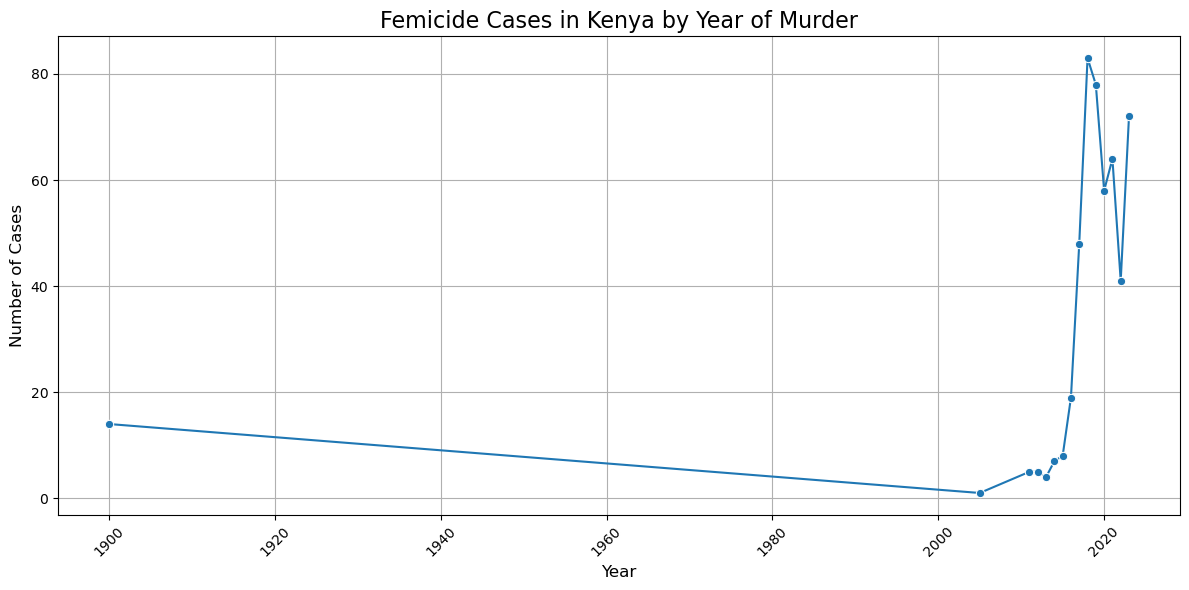

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count cases by year
femicide_by_year = df_1_cleaned['date of murder'].dt.year.value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=femicide_by_year.index, y=femicide_by_year.values, marker='o')
plt.title("Femicide Cases in Kenya by Year of Murder", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


##### Monthly Distribution of Femicide Cases

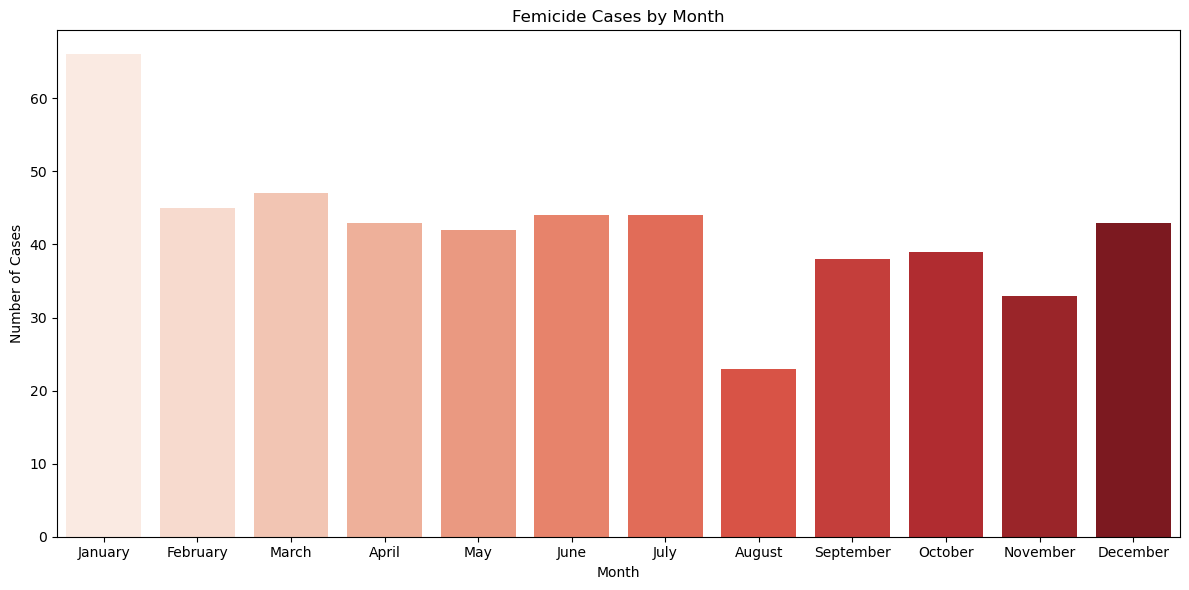

In [35]:
# Extract month names from 'date of murder'
df_1_cleaned['murder_month'] = df_1_cleaned['date of murder'].dt.month_name()

# Reorder months 
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts = df_1_cleaned['murder_month'].value_counts().reindex(ordered_months)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='Reds')
plt.title('Femicide Cases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


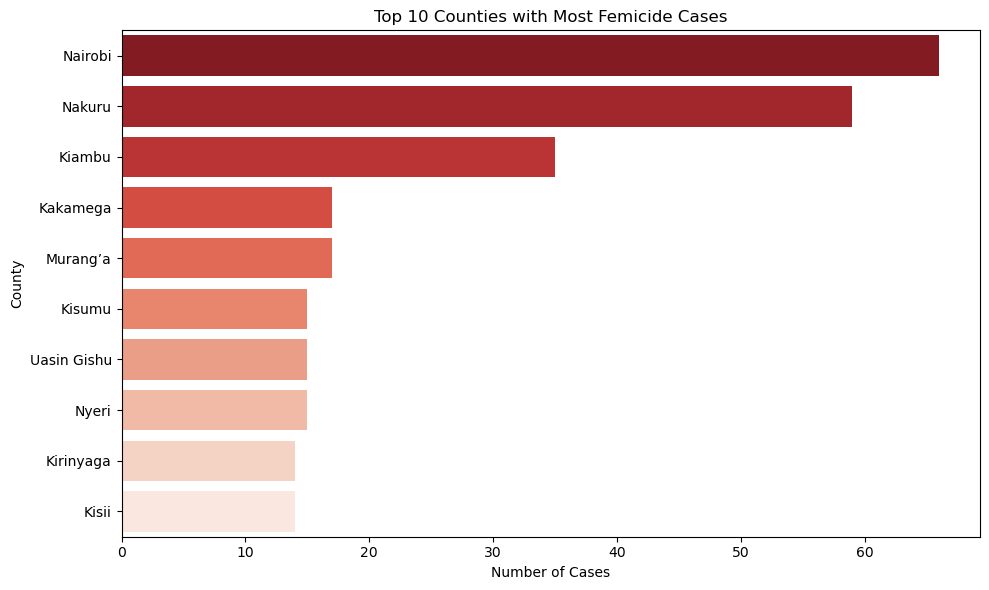

In [36]:
# Top 10 counties
top10_counties = df_1_cleaned['County'].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_counties.values, y=top10_counties.index, palette='Reds_r')

plt.title('Top 10 Counties with Most Femicide Cases')
plt.xlabel('Number of Cases')
plt.ylabel('County')
plt.tight_layout()
plt.show()

In [37]:
import json
with open('kenya_constituencies.geojson','r',encoding='utf-8') as f:
    data = json.load(f)
print(data['features'][0]['properties'])

{'OBJECTID': 1, 'COUNTY_NAM': 'NAIROBI', 'CONST_CODE': 288, 'CONSTITUEN': 'KAMUKUNJI', 'COUNTY_ASS': 0, 'COUNTY_A_1': '', 'REGIST_CEN': 0, 'REGISTRATI': '', 'COUNTY_COD': 47, 'Shape_Leng': 0.16463159484, 'Shape_Area': 0.00097789543, 'name': 'KAMUKUNJI'}


In [38]:
# Build a mapping from county to list of geometries (polygons)
from collections import defaultdict

county_shapes = defaultdict(list)

for feature in data['features']:
    county = feature['properties']['COUNTY_NAM']
    geometry = feature['geometry']
    county_shapes[county].append(geometry)

In [39]:
# Count number of cases per county in the data
county_counts = df_1_cleaned['County'].value_counts().reset_index()
county_counts.columns = ['County', 'Cases']
print(county_counts.head())

     County  Cases
0   Nairobi     66
1    Nakuru     59
2    Kiambu     35
3  Kakamega     17
4  Murangâ€™a     17


In [40]:

correction_map = {
    "ELEGEYO MARAKWET": "ELGEYO MARAKWET",
    "THARAKA  NITHI": "THARAKA NITHI"}

# Function to normalize county names
def normalize_county_name(name):
    if not name:
        return ''
    name = name.strip().upper().replace('â€™', "'").replace("-", " ")
    name = re.sub(r'\s+', ' ', name)  # Replace multiple spaces with one
    return correction_map.get(name, name)  # Apply correction if exists

# Apply normalization to the DataFrame column
county_counts['County'] = county_counts['County'].apply(normalize_county_name)

# Check unmatched counties
geojson_counties = {normalize_county_name(f['properties']['COUNTY_NAM']) for f in data['features']}
dataframe_counties = set(county_counts['County'])

unmatched = geojson_counties - dataframe_counties
if unmatched:
    print("GeoJSON counties not in county_counts:", unmatched)

GeoJSON counties not in county_counts: {'', 'SAMBURU', 'WAJIR'}


In [41]:
# Group  data 
county_counts = df_1_cleaned['County'].value_counts().reset_index()
county_counts.columns = ['County', 'cases']
county_counts['County'] = county_counts['County'].apply(normalize_county_name)


In [42]:
# Convert county_counts to dictionary for fast lookup
county_case_dict = dict(zip(county_counts['County'], county_counts['cases']))

combined = []
for feature in data['features']:
    county_name = normalize_county_name(feature['properties']['COUNTY_NAM'])
    case_count = county_case_dict.get(county_name, 0)
    combined.append({
        'county': county_name,
        'cases': case_count,
        'shapes': [feature['geometry']]
    })
print(combined[0])

{'county': 'NAIROBI', 'cases': 66, 'shapes': [{'type': 'Polygon', 'coordinates': [[[36.87612497, -1.2838572], [36.87454353, -1.28124174], [36.87196269, -1.28362396], [36.86728922, -1.28753368], [36.86796498, -1.2891223], [36.86357252, -1.29116789], [36.86272068, -1.29130986], [36.86184407, -1.28913816], [36.85249232, -1.29332641], [36.85121747, -1.29447561], [36.84167725, -1.29240556], [36.83830859, -1.29205841], [36.83686856, -1.2899755], [36.8343485, -1.28920405], [36.82849836, -1.29213555], [36.82716118, -1.28953835], [36.83146843, -1.28740401], [36.83217559, -1.28589969], [36.83725428, -1.28566825], [36.83965863, -1.28494824], [36.84053293, -1.28442108], [36.84102152, -1.28379107], [36.84430017, -1.28305819], [36.84442874, -1.28043527], [36.84639116, -1.28030452], [36.84374289, -1.26765645], [36.84941599, -1.26633951], [36.85892076, -1.2660951], [36.85962682, -1.26481875], [36.86022427, -1.26446572], [36.86223384, -1.26370533], [36.86959324, -1.26150566], [36.87595373, -1.26253341]

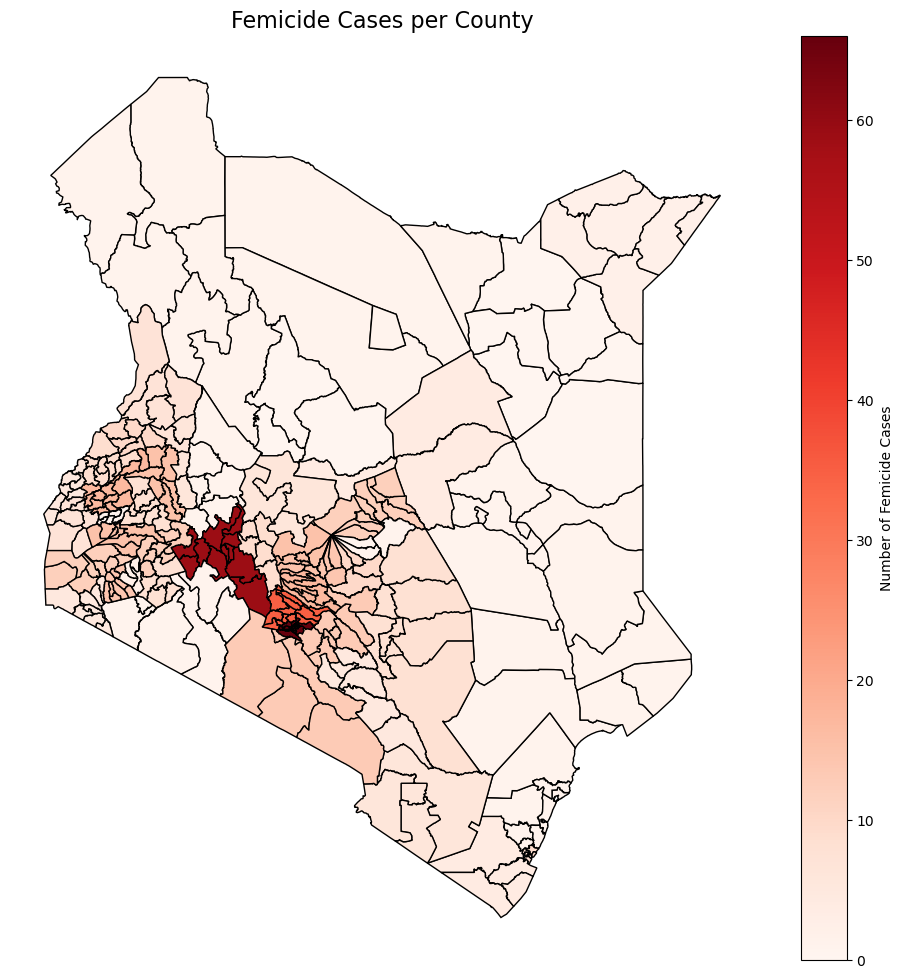

In [43]:
from shapely.geometry import shape
import matplotlib.cm as cm
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(12, 12))
max_cases = max(c['cases'] for c in combined)
norm = colors.Normalize(vmin=0, vmax=max_cases)
cmap = cm.Reds

for item in combined:
    for geom in item['shapes']:
        poly = shape(geom)
        color = cmap(norm(item['cases']))
        if poly.geom_type == 'Polygon':
            x, y = poly.exterior.xy
            ax.fill(x, y, color=color, edgecolor='black')
        elif poly.geom_type == 'MultiPolygon':
            for p in poly.geoms:
                x, y = p.exterior.xy
                ax.fill(x, y, color=color, edgecolor='black')


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Number of Femicide Cases')

plt.title('Femicide Cases per County', fontsize=16)
plt.axis('off')
plt.show()


##### Age Distribution

<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

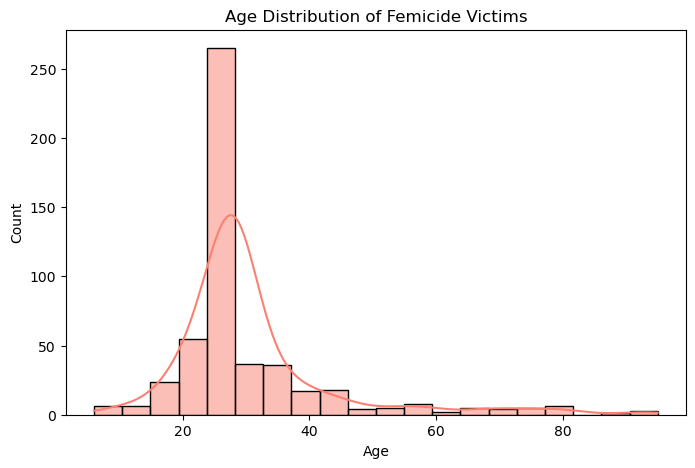

In [44]:
plt.figure(figsize=(8, 5))
sns.histplot(df_1_cleaned['Age'], bins=20, kde=True, color='salmon')
plt.title('Age Distribution of Femicide Victims')
plt.xlabel('Age')
plt


##### Mode of Killing 

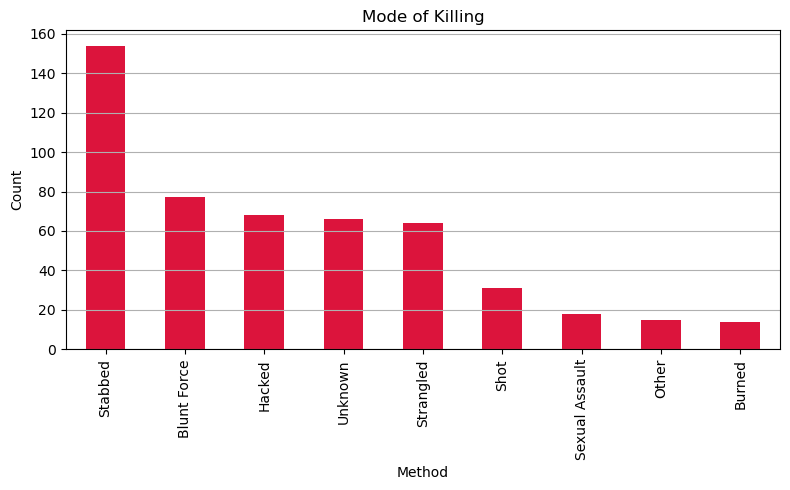

In [45]:
plt.figure(figsize=(8, 5))
df_1_cleaned['Mode of killing'].value_counts().plot(kind='bar', color='crimson')
plt.title('Mode of Killing')
plt.xlabel('Method')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##### Suspect Relationship

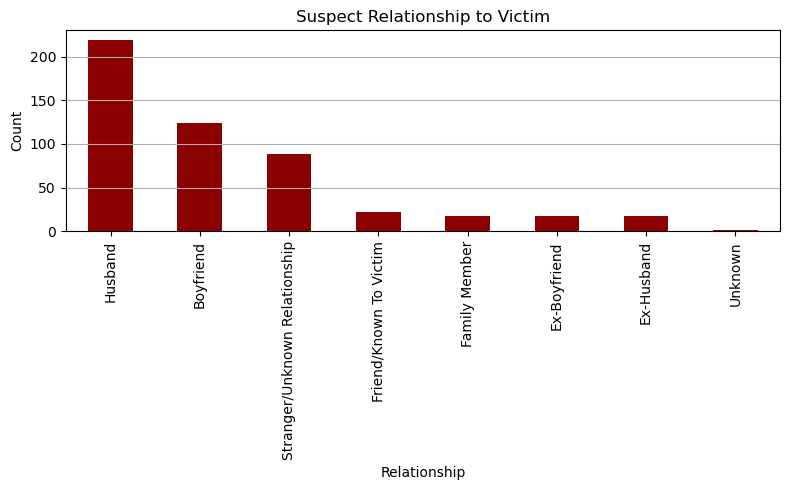

In [46]:
plt.figure(figsize=(8, 5))
df_1_cleaned['suspect relationship'].value_counts().plot(kind='bar', color='#8B0000')  # dark rich red
plt.title('Suspect Relationship to Victim')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Type of femicide

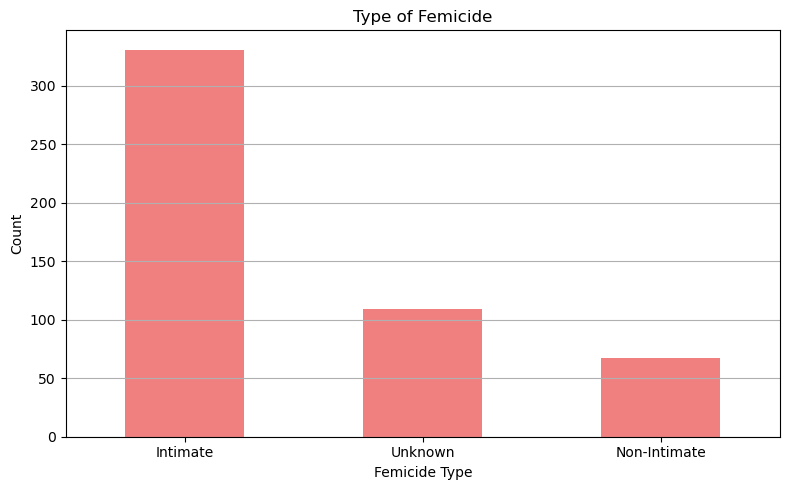

In [47]:
plt.figure(figsize=(8, 5))
df_1_cleaned['Type of femicide'].value_counts().plot(kind='bar', color='#F08080')  # light coral
plt.title('Type of Femicide')
plt.xlabel('Femicide Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

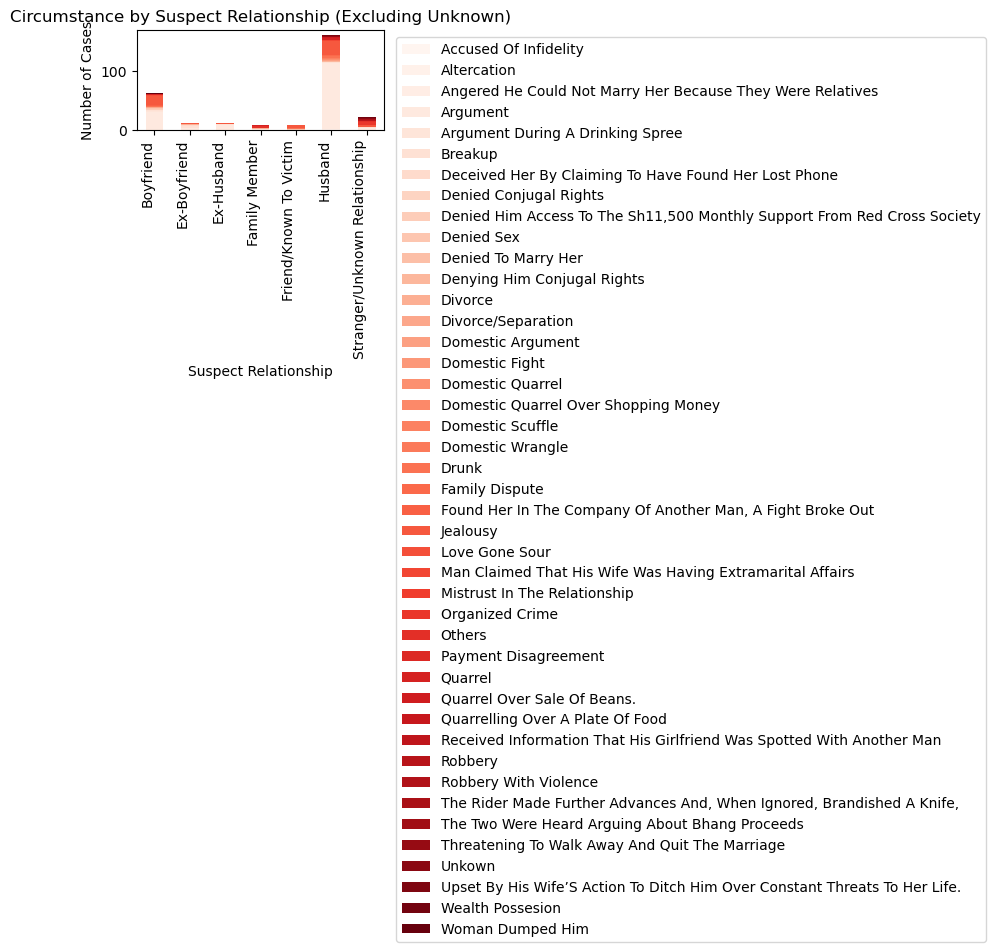

In [48]:

df_1_cleaned['Circumstance'] = df_1_cleaned['Circumstance'].astype(str).str.strip()
filtered_df = df_1_cleaned[~df_1_cleaned['Circumstance'].str.lower().str.contains('unknown', na=False)]

# Create a Figure and Axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot with suspect relationship on X and circumstance as stacked categories
pd.crosstab(
    filtered_df['suspect relationship'],
    filtered_df['Circumstance']
).plot(
    kind='bar',
    stacked=True,
    colormap='Reds',
    ax=ax)

# Shift the plotting area within the figure
ax.set_position([0.1, 0.1, 0.6, 0.8])

# Move the legend out to the right
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Add labels
ax.set_title('Circumstance by Suspect Relationship (Excluding Unknown)')
ax.set_xlabel('Suspect Relationship')
ax.set_ylabel('Number of Cases')

plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


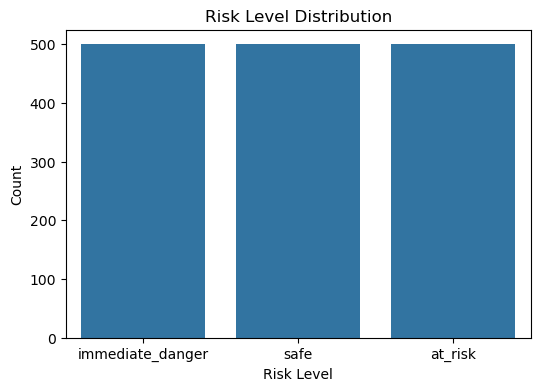

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of risk levels
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='risk_level', order=df['risk_level'].value_counts().index)
plt.title("Risk Level Distribution")
plt.ylabel("Count")
plt.xlabel("Risk Level")
plt.show()


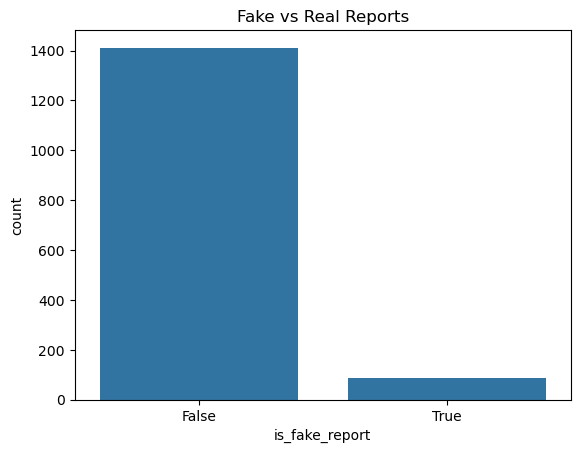

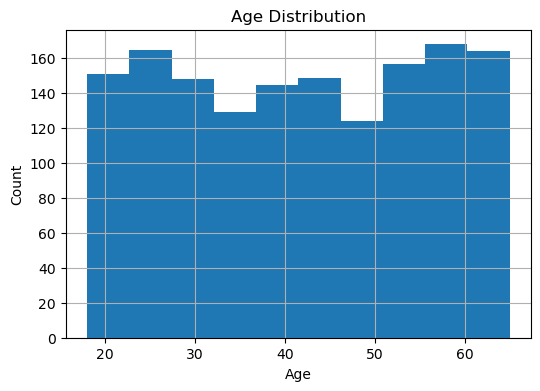

In [50]:
# Fake report distribution
sns.countplot(data=df, x='is_fake_report')
plt.title("Fake vs Real Reports")
plt.show()

# Age distribution
df['age'].hist(bins=10, figsize=(6, 4))
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()



### FEATURE ENGINEERING

In [51]:
#Risk key word counts
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
def count_words(text):
    return len(text.split())

def count_sentences(text):
    return text.count('.') + text.count('!') + text.count('?')

def count_all_caps(text):
    return sum(1 for word in text.split() if word.isupper())

def count_exclamations(text):
    return text.count('!')

# Risk keywords list (you can expand this)
risk_keywords = [
    'kill', 'hit', 'beat', 'threat', 'knife', 'gun', 'blood', 
    'abuse', 'danger', 'violence', 'escape', 'scream', 'stab', 'rape'
]

def contains_risk_keywords(text):
    text = text.lower()
    return any(keyword in text for keyword in risk_keywords)

df['clean_text'] = df['text'].apply(clean_text)

In [52]:
y = df['risk_level']  

In [53]:
#TF-IDF and Meta-features
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

# Basic Text Features
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['sentence_count'] = df['text'].apply(lambda x: len(re.split(r'[.!?]', str(x))) - 1)
df['uppercase_count'] = df['text'].apply(lambda x: sum(1 for w in str(x).split() if w.isupper()))
df['exclamation_count'] = df['text'].apply(lambda x: str(x).count('!'))

# Subjectivity & Polarity (Emotion)
df['subjectivity_score'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df['sentiment_score'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 3. Risk Keyword Count
risk_keywords = ['kill', 'hurt', 'stab', 'beat', 'abuse', 'die', 'murder', 'choke', 'hit', 'rape', 'blood']
df['risk_keyword_count'] = df['text'].apply(
    lambda x: sum(1 for word in str(x).lower().split() if word in risk_keywords)
)

# Sentiment vs Risk Level Mismatch
def check_mismatch(row):
    if row['risk_level'] == 'safe' and row['sentiment_score'] < -0.2:
        return 1
    elif row['risk_level'] == 'immediate_danger' and row['sentiment_score'] > 0.2:
        return 1
    else:
        return 0

df['sentiment_risk_mismatch'] = df.apply(check_mismatch, axis=1)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2), stop_words='english')
X_tfidf = vectorizer.fit_transform(df['text'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Combine All Features
meta_features = df[[
    'word_count', 'sentence_count', 'uppercase_count', 'exclamation_count',
    'subjectivity_score', 'sentiment_score', 'risk_keyword_count',
    'sentiment_risk_mismatch'
]].reset_index(drop=True)

X_final = pd.concat([meta_features, tfidf_df], axis=1)

# Target
y = df['risk_level']

# Print shape 
print("Final feature shape:", X_final.shape)
print("Target distribution:\n", y.value_counts())


Final feature shape: (1500, 157)
Target distribution:
 risk_level
immediate_danger    500
safe                500
at_risk             500
Name: count, dtype: int64


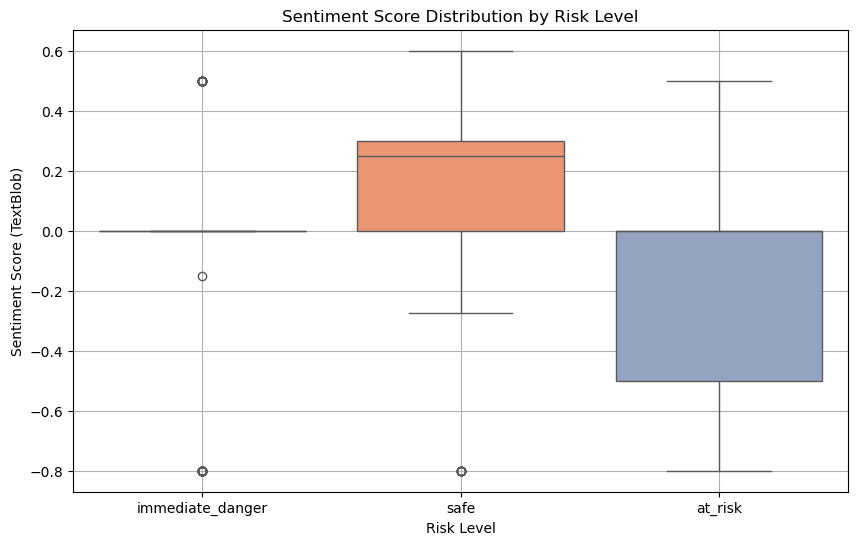

In [54]:
#Sentiment score
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='risk_level', y='sentiment_score', palette='Set2')
plt.title('Sentiment Score Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Sentiment Score (TextBlob)')
plt.grid(True)
plt.show()


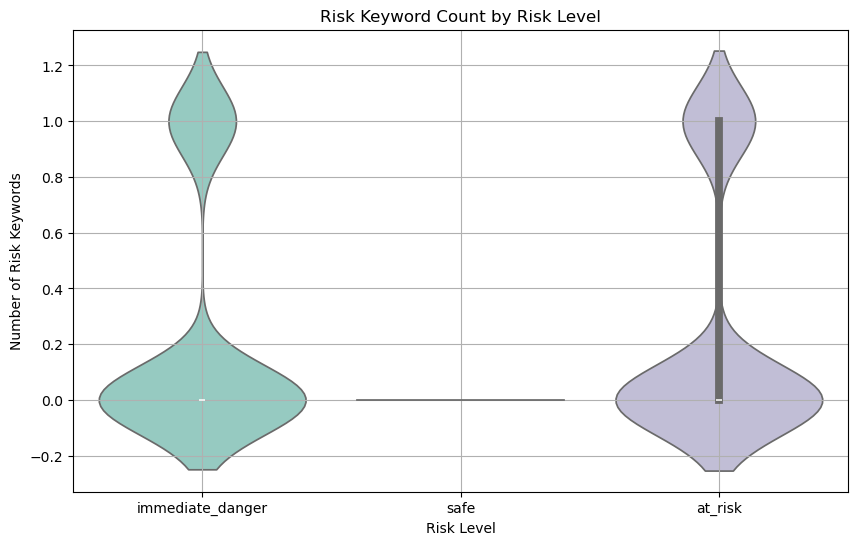

In [55]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='risk_level', y='risk_keyword_count', palette='Set3')
plt.title('Risk Keyword Count by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Number of Risk Keywords')
plt.grid(True)
plt.show()


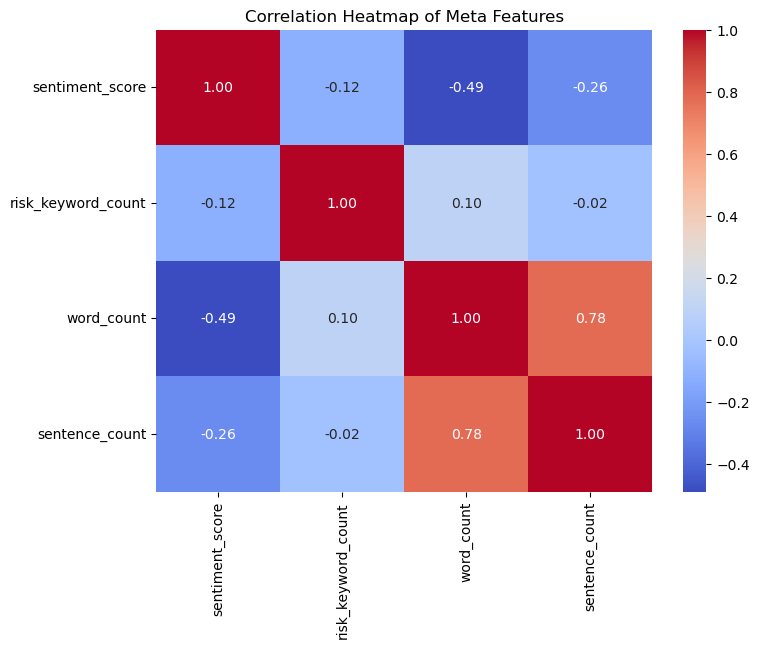

In [56]:
meta_features = ['sentiment_score', 'risk_keyword_count', 'word_count', 'sentence_count']

plt.figure(figsize=(8, 6))
sns.heatmap(df[meta_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Meta Features')
plt.show()


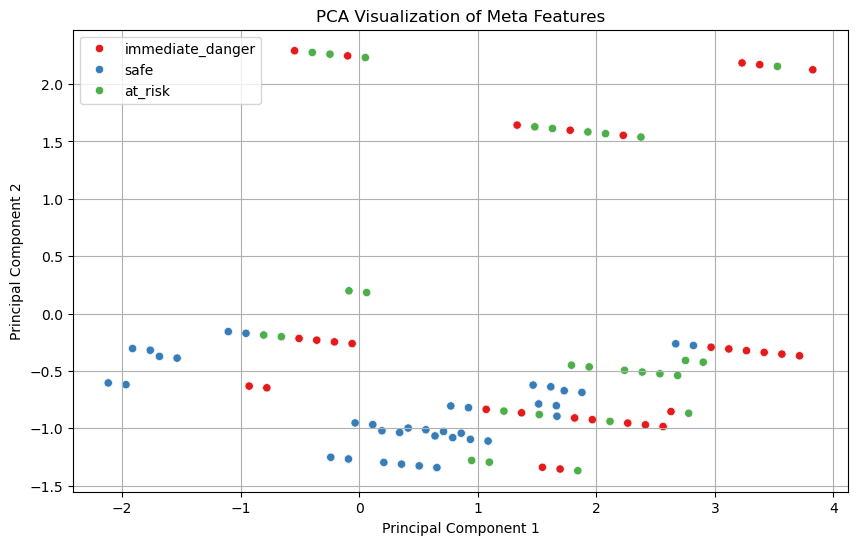

In [57]:
# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
X_scaled = StandardScaler().fit_transform(df[meta_features])

# PCA to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='risk_level', palette='Set1')
plt.title('PCA Visualization of Meta Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [58]:
df['clean_text'].shape


(1500,)

### MODELING 

#### Logistic Regression

In [59]:

# Features & target
X = df['clean_text']   # keep emojis
y = df['risk_level']   # safe, at_risk, immediate_danger

# Train-test split (stratify to keep balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# Define the simplified pipeline
pipeline_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# Define the hyperparameters to tune. 
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)], # Test unigrams and bigrams
    'clf__C': [0.1, 1.0, 10.0], # Regularization parameter
}

# GridSearchCV to find the best parameters
grid = GridSearchCV(pipeline_model, param_grid, cv=3, verbose=1, n_jobs=-1, scoring='f1_macro')
grid.fit(X_train, y_train)

# The rest of the notebook can use grid_search.best_estimator_ instead of pipeline_model
best_model = grid.best_estimator_



Fitting 3 folds for each of 6 candidates, totalling 18 fits


#### Random Forest

In [60]:
# Split
X = df[['clean_text', 'word_count', 'sentiment_score']]  # Example features
y = df['risk_level']
X_train_rm, X_test_rm, y_train_rm, y_test_rm = train_test_split(X, y, stratify=y, random_state=42)

# Define vectorizer and preprocessor
text_features = 'clean_text'
meta_features = ['word_count',  'sentiment_score']

preprocessor = ColumnTransformer(transformers=[
    ('text', TfidfVectorizer(), text_features),
    ('meta', StandardScaler(), meta_features)
])

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Fit
pipeline.fit(X_train_rm, y_train_rm)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', TfidfVectorizer(),
                                                  'clean_text'),
                                                 ('meta', StandardScaler(),
                                                  ['word_count',
                                                   'sentiment_score'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

### EVALUATION

Classification Report:                   precision    recall  f1-score   support

         at_risk       1.00      0.91      0.95       100
immediate_danger       0.92      1.00      0.96       100
            safe       1.00      1.00      1.00       100

        accuracy                           0.97       300
       macro avg       0.97      0.97      0.97       300
    weighted avg       0.97      0.97      0.97       300



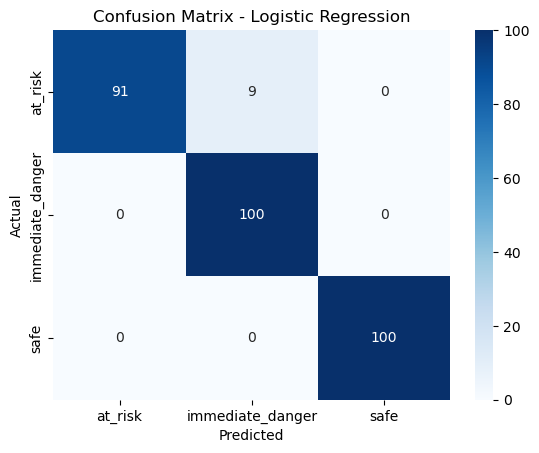

In [61]:
# Evaluation of Logistic Regression

# Evaluation
y_pred = grid.predict(X_test)

print("Classification Report:", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred, labels=grid.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid.classes_,
            yticklabels=grid.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [62]:
# Evaluation of random forest
from sklearn.metrics import classification_report
y_pred_rm = pipeline.predict(X_test_rm)
print(classification_report(y_test_rm, y_pred_rm))


                  precision    recall  f1-score   support

         at_risk       0.97      0.94      0.95       125
immediate_danger       0.94      0.97      0.95       125
            safe       1.00      1.00      1.00       125

        accuracy                           0.97       375
       macro avg       0.97      0.97      0.97       375
    weighted avg       0.97      0.97      0.97       375



### DistilBERT

In [63]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset
import torch
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


# Prepare data
df = df[['clean_text', 'risk_level']].copy()
label_map = {label: idx for idx, label in enumerate(sorted(df["risk_level"].unique()))}
df["label"] = df["risk_level"].map(label_map)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

def tokenize(batch):
    return tokenizer(batch["clean_text"], padding="max_length", truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

train_dataset = train_dataset.remove_columns(["clean_text", "risk_level"])
test_dataset = test_dataset.remove_columns(["clean_text", "risk_level"])
train_dataset.set_format("torch")
test_dataset.set_format("torch")

model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", 
    num_labels=len(label_map)
)

# FIX: remove unsupported keyword
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",   # old: evaluation_strategy
    logging_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True)

def compute_metrics(p):
    preds = p.predictions.argmax(axis=1)
    labels = p.label_ids
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics)

trainer.train()

#Evaluate model
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)




ConnectionError: (MaxRetryError('HTTPSConnectionPool(host=\'huggingface.co\', port=443): Max retries exceeded with url: /api/models/distilbert-base-uncased/tree/main/additional_chat_templates?recursive=False&expand=False (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000210D4CBAC50>: Failed to resolve \'huggingface.co\' ([Errno 11001] getaddrinfo failed)"))'), '(Request ID: b717e48c-a5d4-44ba-b45a-187212962d56)')

#### Model Interpretation with SHAP

In [ ]:

import shap
import numpy as np
import torch
# Get a sample text from the test set
X_test_text = test_df['clean_text'].iloc[[0]]  # double brackets keep proper shape

# Define a function that the SHAP explainer can use to get predictions from the model
def predict_proba_from_text(texts):
    # Tokenize the input text
    encoded = tokenizer(
        list(texts),  # works for Series, list, or numpy array
        padding='max_length',
        truncation=True,
        max_length=128,
        return_tensors='pt'
    )
    # Move to same device as the model
    device = next(model.parameters()).device
    encoded = {k: v.to(device) for k, v in encoded.items()}

    # Get predictions from the model
    with torch.no_grad():
        logits = model(**encoded).logits

    # Apply softmax to get probabilities
    return torch.nn.functional.softmax(logits, dim=1).cpu().numpy()

# Create a SHAP text masker (important for correct token handling)
masker = shap.maskers.Text(tokenizer)

# Create a SHAP explainer with the masker
explainer = shap.Explainer(predict_proba_from_text, masker, algorithm="partition")

# Calculate SHAP values for the sample text
shap_values = explainer(X_test_text)

# The labels from your `label_map`
class_names = list(label_map.keys())


In [ ]:
# Save the model 
from transformers import AutoModelForSequenceClassification, AutoTokenizer
model.save_pretrained("./distilbert_model_v2", safe_serialization=False)
tokenizer.save_pretrained("./distilbert_model_v2")